In [1]:
import os
import sys
import glob
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
def drop_specific_cols(df):
    cols = ['Unnamed: 0','analysis_sample_rate','danceability','energy','genre','artist_7digitalid','audio_md5','analyzer_version','artist_latitude','artist_location','artist_longitude','artist_playmeid','track_7digitalid','release_7digitalid','key_confidence','mode_confidence','time_signature_confidence']
    df = df.drop(cols,axis=1)
    idx_cols = 'idx_'
    return df[df.columns.drop(list(df.filter(regex=idx_cols)))]

In [3]:
df = pd.read_csv('msd_summary.csv')
df = drop_specific_cols(df)

In [10]:
df.describe()

,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature,artist_familiarity,artist_hotttnesss,song_hotttnesss,year
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999815.000000,999988.000000,581965.000000,1000000.000000
mean,249.500755,0.819850,5.321964,-10.124039,0.666408,240.625024,123.889218,3.593947,0.557203,0.379813,0.356051,1030.325652
std,126.229636,3.304457,3.601595,5.197245,0.471496,124.079924,35.055981,1.221925,0.138611,0.125960,0.234441,998.745002
min,0.313020,0.000000,0.000000,-58.178000,0.000000,0.313000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.740770,0.000000,2.000000,-12.672000,0.000000,173.180000,97.995000,3.000000,0.478253,0.336324,0.215080,0.000000
50%,228.858320,0.194000,5.000000,-8.963000,1.000000,219.759000,122.086000,4.000000,0.558905,0.386194,0.377532,1969.000000
75%,289.932610,0.432000,9.000000,-6.386000,1.000000,279.713000,144.089000,4.000000,0.641420,0.444066,0.531985,2002.000000
max,3034.905670,1163.941000,11.000000,4.318000,1.000000,3030.622000,302.300000,7.000000,1.000000,1.082503,1.000000,2011.000000


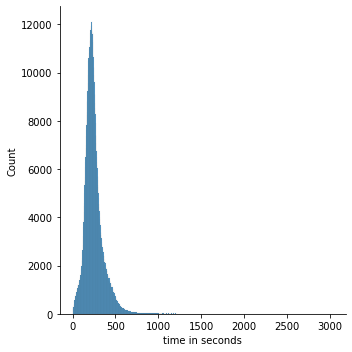

In [4]:
from scipy.stats import chi2
x = pd.Series(df['duration'], name="time in seconds")
ax = sns.displot(x)


(9.577775402868582, -0.3430569307145269, 26.087154789824126)


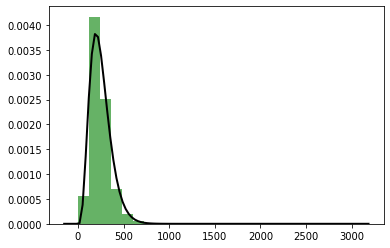

In [7]:

from scipy.stats import chi2

data = df['duration']
print(chi2.fit(data))
#no sé què són a, b i c 
a, b, c = chi2.fit(data)


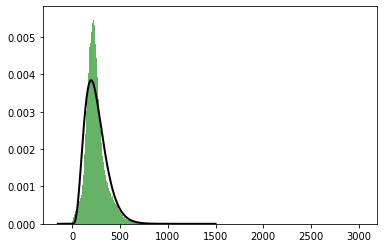

In [9]:
# Plot the histogram.
plt.hist(data, bins=1000, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, 1500, 10000)
p = chi2.pdf(x, a, b, c)
plt.plot(x, p, 'k', linewidth=2)
plt.show()